# Практическая работа №1

**Цель работы:** научиться применять инструменты для подготовки данных.

**Инструменты:** pandas, numpy, scipy, matplotlib/seaborn.

**Содержание:**

Для предложенных датасетов провести первичный статистический анализ. Для этого необходимо:

1. Вычислить меры центральной тенденции (выборочное среднее, медиана, мода и т.д.)
2. Вычислить меры разброса (дисперсия, среднеквадратичное отклонение, min/max-value, IQR)
3. Вычислить параметры формы распределений каждого признака (асимметрия, эксцесс)
4. Построить гистограммы каждого признака, а также ECDF (функция распределения) и KDE (ядерная оценка плотности вероятности). Можно также построить pairplot из seaborn.
5. Вычислить матрицу корреляций между признаками. Построить тепловую карту (heatmap).

После этого исследовать датасеты на возможность:

1. Извлечения новых признаков (feature extraction).
2. Преобразования признаков (feature transformation). *Как минимум z-score scaling.*
3. Отбора признаков и объектов (feature selection). *Как минимум анализ выбросов, аномалий и сильно коррелирующих признаков.*

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#этот сет для примера
#ADVERT_CSV = "https://drive.google.com/uc?id=1haqJjujRq_VLp4j4DXJUcWUmp9VmANqV"

#этот сет для работы
HEART_CSV = "https://drive.google.com/uc?id=1vbbZejzkYh6pooJM5G41CICC3GYIPfUa"

## HEART

In [ ]:
df = pd.read_csv(HEART_CSV)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 1. Вычислить меры центральной тенденции (выборочное среднее, медиана, мода и т.д.)

Выборочное среднее

In [ ]:
df.mean()

age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64

Медиана

In [ ]:
df.median()

age          55.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

Мода

In [ ]:
df.mode()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58.0,1.0,0.0,120.0,197,0.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0,1.0
1,NaN,NaN,NaN,NaN,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2. Вычислить меры разброса (дисперсия, среднеквадратичное отклонение, min/max-value, IQR)

Дисперсия

In [ ]:
df.var()

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64

Среднеквадратичное отклонение

In [ ]:
df.std()

age          9.082101
sex          0.466011
cp           1.032052
trestbps    17.538143
chol        51.830751
fbs          0.356198
restecg      0.525860
thalach     22.905161
exang        0.469794
oldpeak      1.161075
slope        0.616226
ca           1.022606
thal         0.612277
target       0.498835
dtype: float64

Мин-Макс

In [ ]:
df.min()

age          29.0
sex           0.0
cp            0.0
trestbps     94.0
chol        126.0
fbs           0.0
restecg       0.0
thalach      71.0
exang         0.0
oldpeak       0.0
slope         0.0
ca            0.0
thal          0.0
target        0.0
dtype: float64

In [ ]:
df.max()

age          77.0
sex           1.0
cp            3.0
trestbps    200.0
chol        564.0
fbs           1.0
restecg       2.0
thalach     202.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
target        1.0
dtype: float64

Квантили

In [ ]:
df.apply(lambda x: np.subtract(*np.percentile(x, [75, 25])))

age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64

### 3. Вычислить параметры формы распределений каждого признака (асимметрия, эксцесс)

Ассиметрия

In [ ]:
df.kurtosis()

age        -0.542167
sex        -1.382961
cp         -1.193071
trestbps    0.929054
chol        4.505423
fbs         1.959678
restecg    -1.362673
thalach    -0.061970
exang      -1.458317
oldpeak     1.575813
slope      -0.627521
ca          0.839253
thal        0.297915
target     -1.980783
dtype: float64

Эксцесс

In [ ]:
df.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64

### 4. Построить гистограммы каждого признака, а также ECDF (функция распределения) и KDE (ядерная оценка плотности вероятности). Можно также построить pairplot из seaborn.

#### Парный график

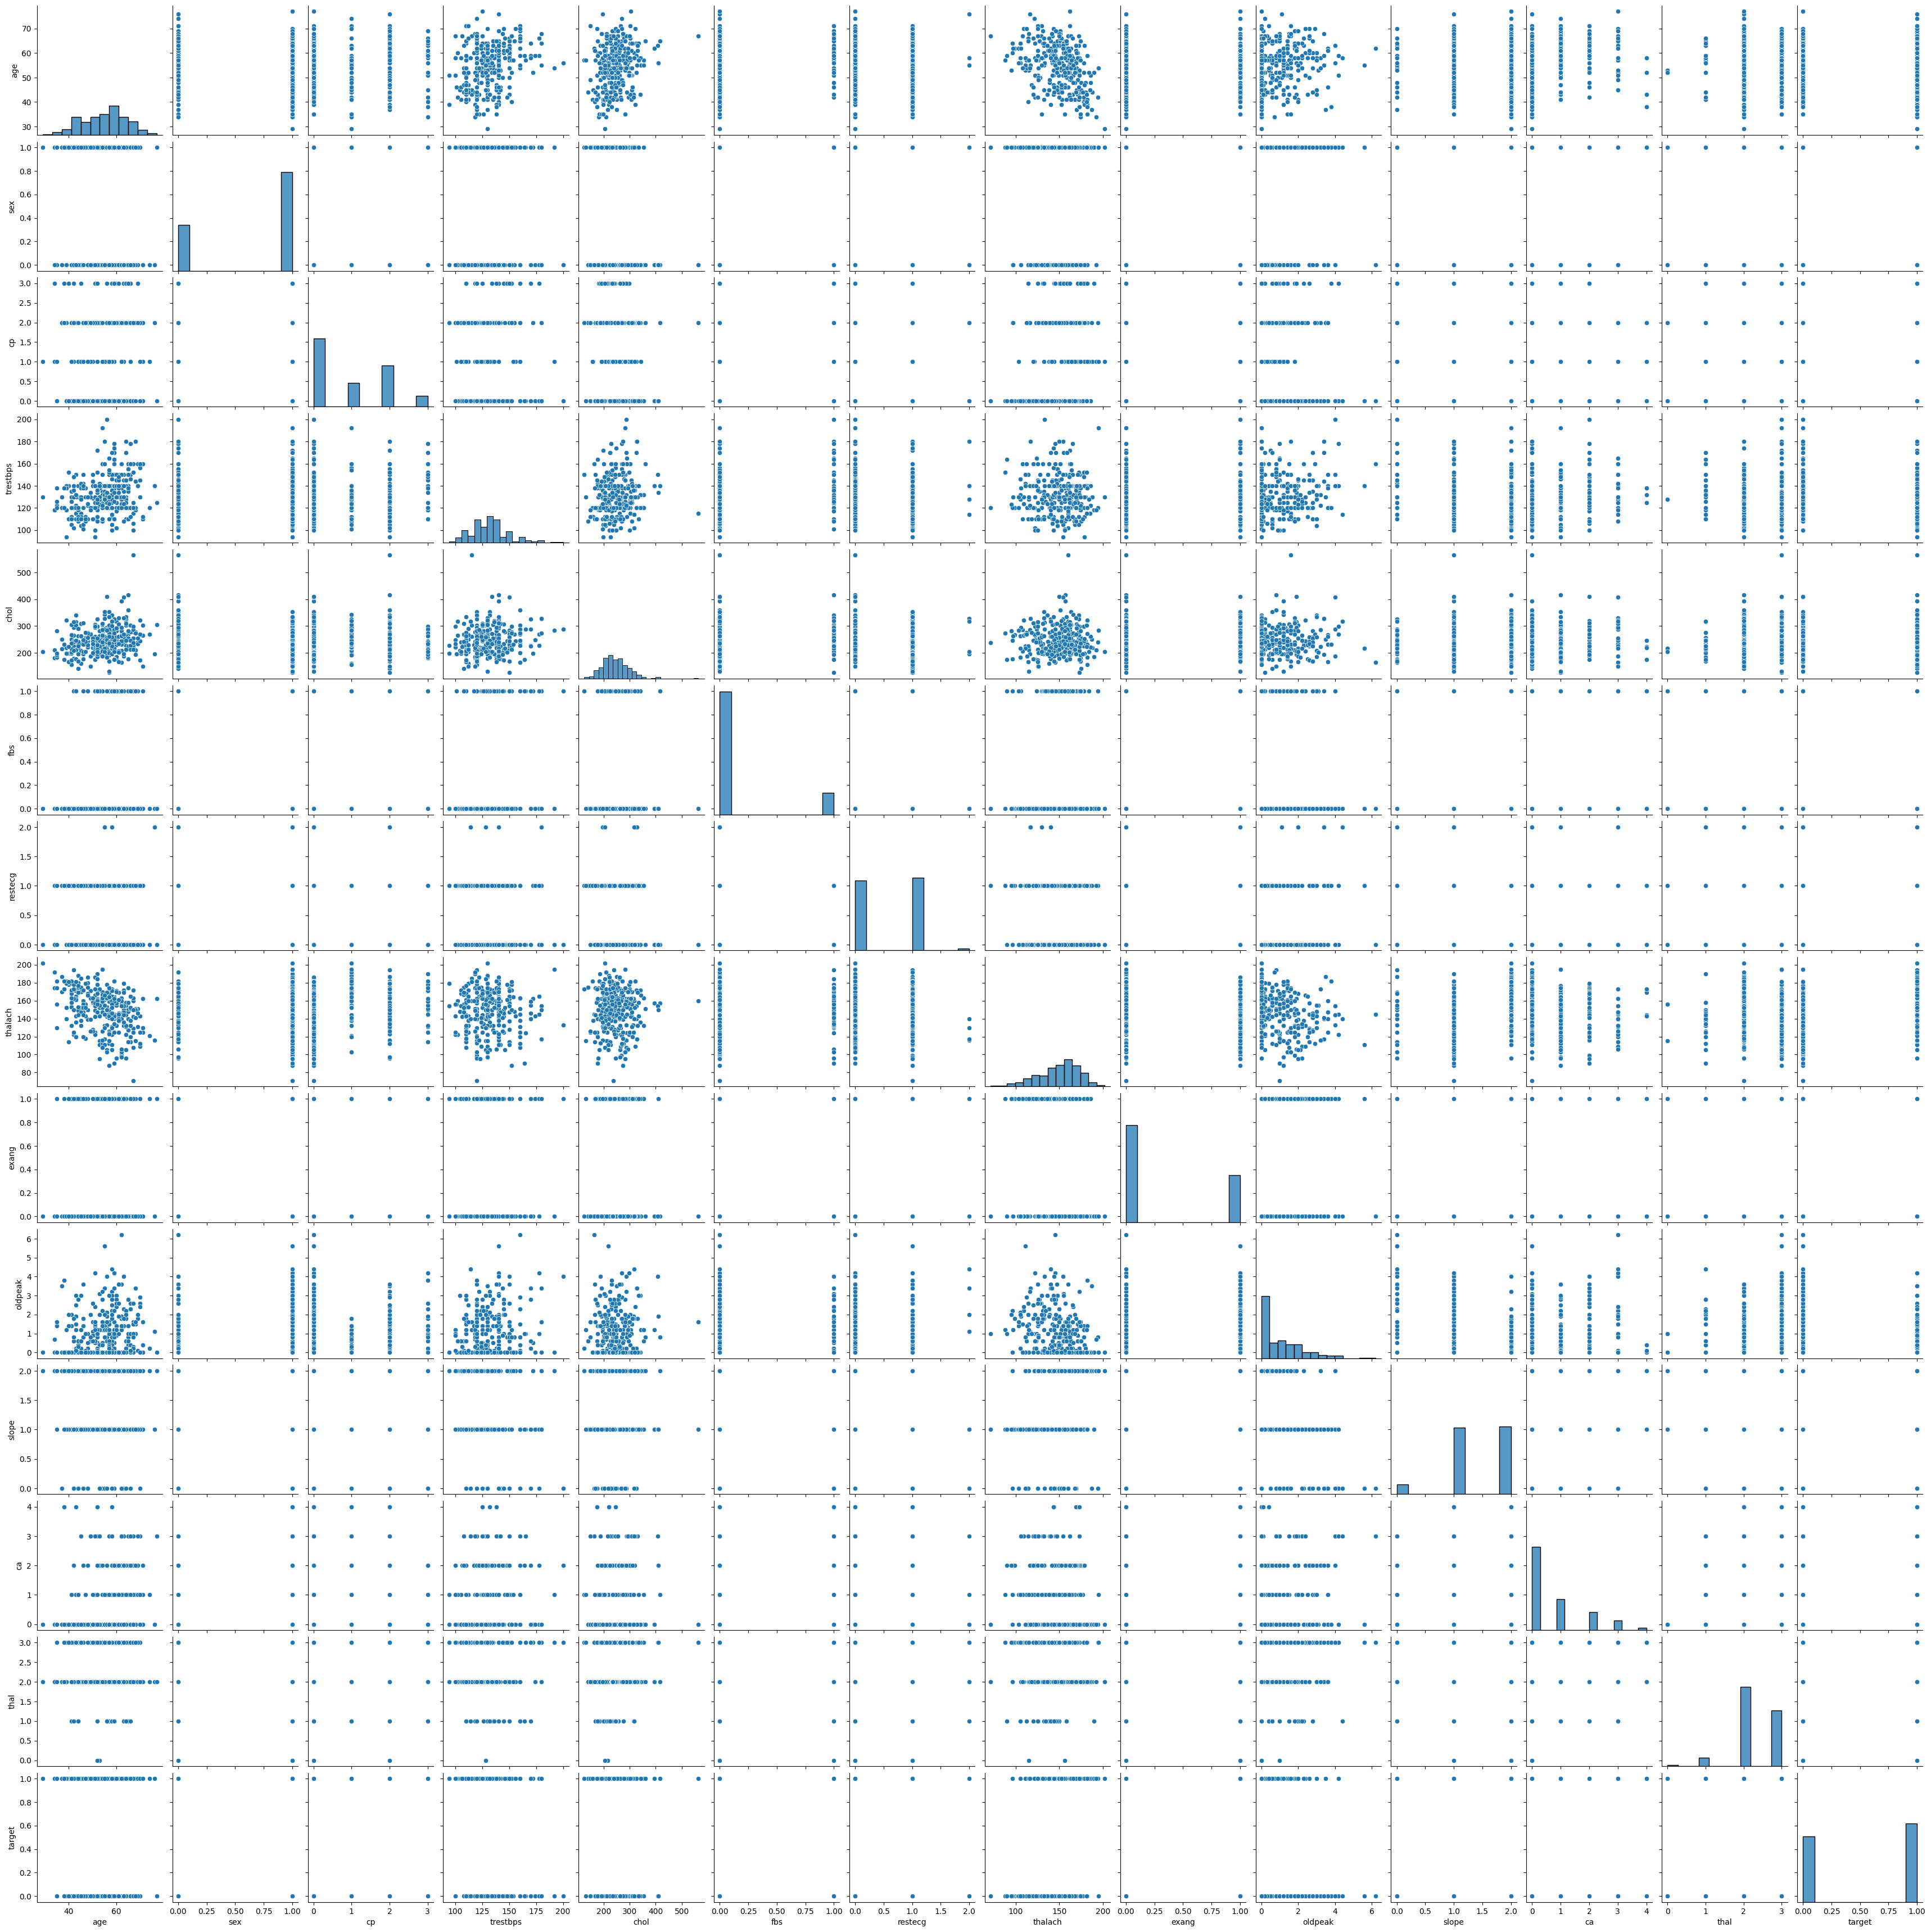

In [ ]:
sns.pairplot(df)

#### AGE

<Axes: xlabel='age', ylabel='Density'>

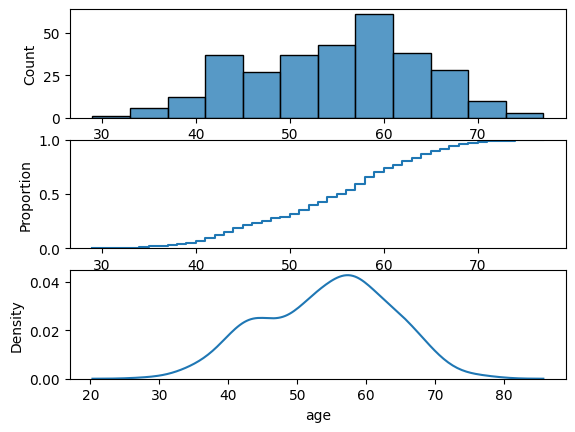

In [ ]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(df.age, ax=axs[0])
sns.ecdfplot(df.age, ax=axs[1])
sns.kdeplot(df.age, ax=axs[2])

#### SEX

<Axes: xlabel='sex', ylabel='Density'>

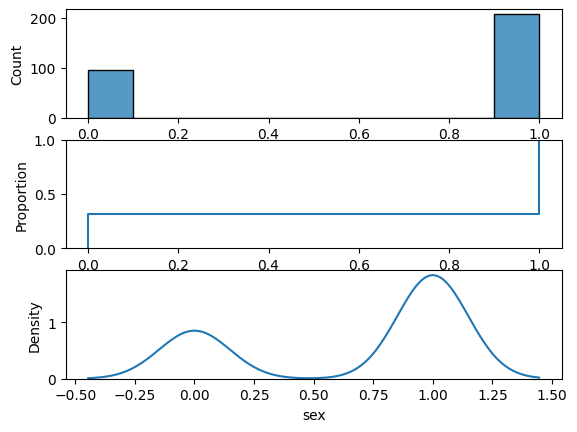

In [ ]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(df.sex, ax=axs[0])
sns.ecdfplot(df.sex, ax=axs[1])
sns.kdeplot(df.sex, ax=axs[2])

#### CP

<Axes: xlabel='cp', ylabel='Density'>

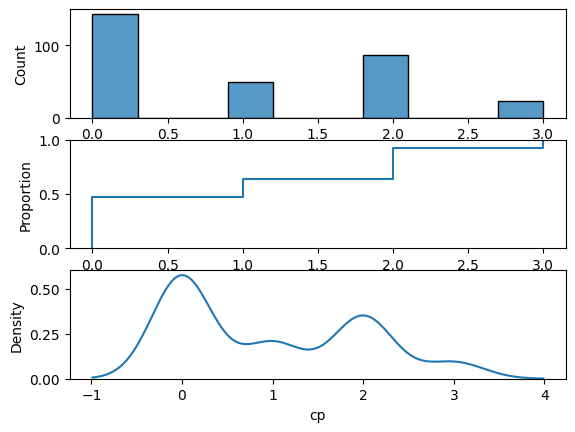

In [ ]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(df.cp, ax=axs[0])
sns.ecdfplot(df.cp, ax=axs[1])
sns.kdeplot(df.cp, ax=axs[2])

#### TRESTBPS

<Axes: xlabel='trestbps', ylabel='Density'>

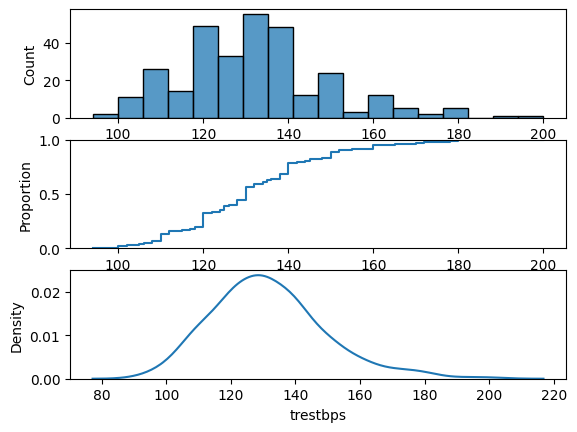

In [ ]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(df.trestbps, ax=axs[0])
sns.ecdfplot(df.trestbps, ax=axs[1])
sns.kdeplot(df.trestbps, ax=axs[2])

#### CHOL

<Axes: xlabel='chol', ylabel='Density'>

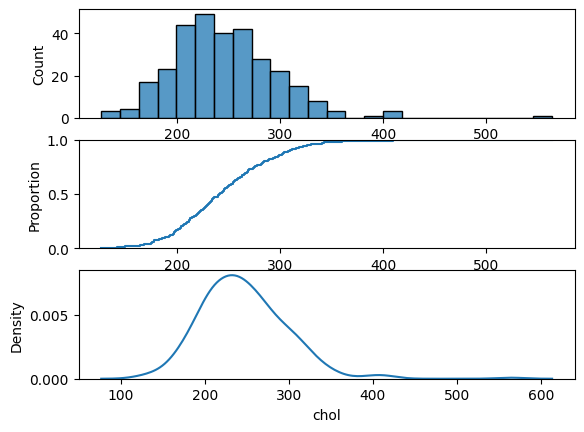

In [ ]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(df.chol, ax=axs[0])
sns.ecdfplot(df.chol, ax=axs[1])
sns.kdeplot(df.chol, ax=axs[2])

#### FBS

<Axes: xlabel='fbs', ylabel='Density'>

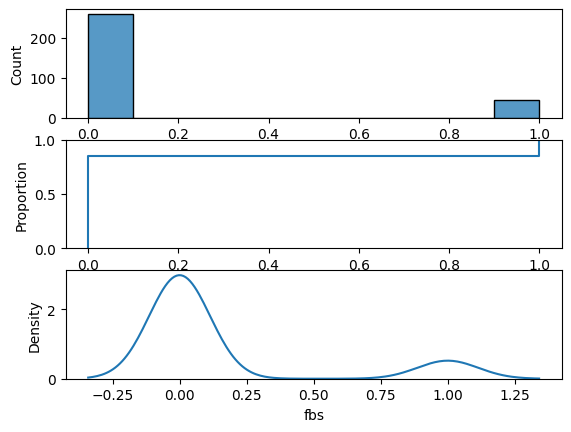

In [ ]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(df.fbs, ax=axs[0])
sns.ecdfplot(df.fbs, ax=axs[1])
sns.kdeplot(df.fbs, ax=axs[2])

#### RESTECG

<Axes: xlabel='restecg', ylabel='Density'>

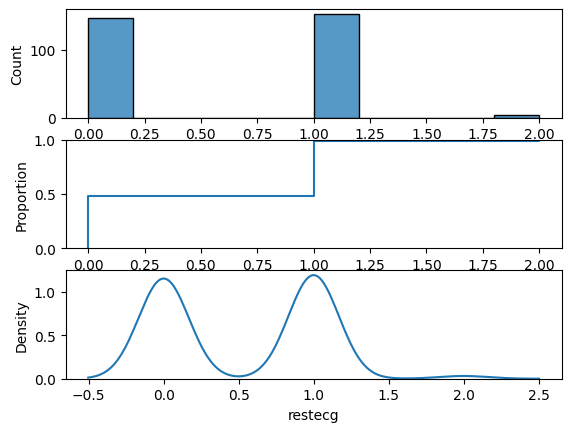

In [ ]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(df.restecg, ax=axs[0])
sns.ecdfplot(df.restecg, ax=axs[1])
sns.kdeplot(df.restecg, ax=axs[2])

#### THALACH

<Axes: xlabel='thalach', ylabel='Density'>

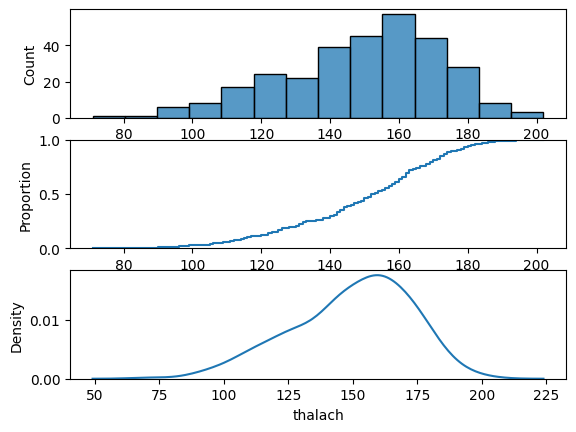

In [ ]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(df.thalach, ax=axs[0])
sns.ecdfplot(df.thalach, ax=axs[1])
sns.kdeplot(df.thalach, ax=axs[2])

#### exang

<Axes: xlabel='exang', ylabel='Density'>

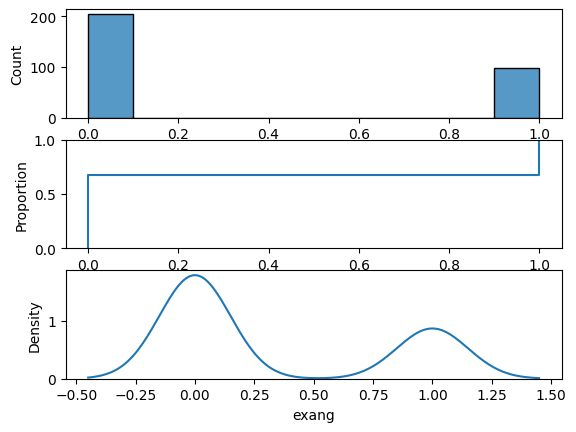

In [ ]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(df.exang, ax=axs[0])
sns.ecdfplot(df.exang, ax=axs[1])
sns.kdeplot(df.exang, ax=axs[2])

#### oldpeak

<Axes: xlabel='oldpeak', ylabel='Density'>

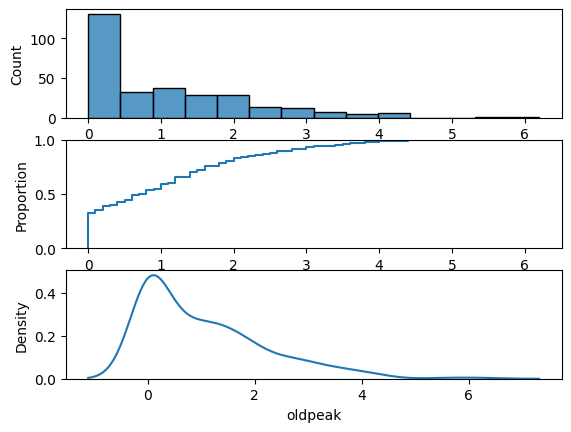

In [ ]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(df.oldpeak, ax=axs[0])
sns.ecdfplot(df.oldpeak, ax=axs[1])
sns.kdeplot(df.oldpeak, ax=axs[2])

#### slope

<Axes: xlabel='slope', ylabel='Density'>

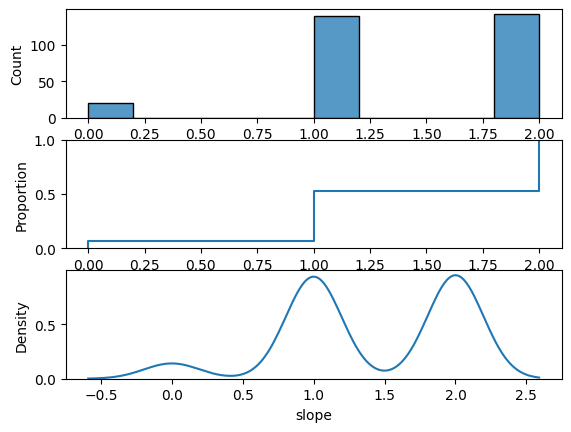

In [ ]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(df.slope, ax=axs[0])
sns.ecdfplot(df.slope, ax=axs[1])
sns.kdeplot(df.slope, ax=axs[2])

#### ca

<Axes: xlabel='ca', ylabel='Density'>

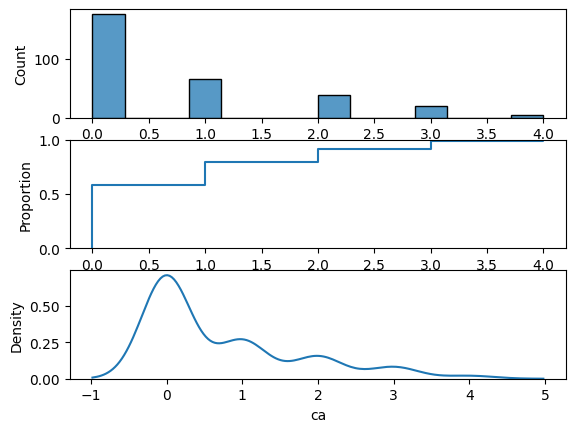

In [ ]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(df.ca, ax=axs[0])
sns.ecdfplot(df.ca, ax=axs[1])
sns.kdeplot(df.ca, ax=axs[2])

#### thal

<Axes: xlabel='thal', ylabel='Density'>

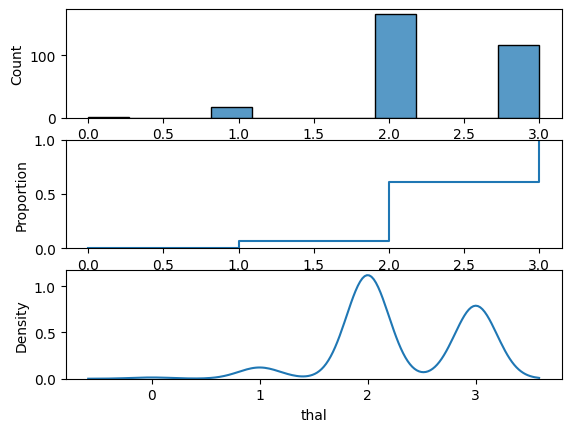

In [ ]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(df.thal, ax=axs[0])
sns.ecdfplot(df.thal, ax=axs[1])
sns.kdeplot(df.thal, ax=axs[2])

#### target

<Axes: xlabel='target', ylabel='Density'>

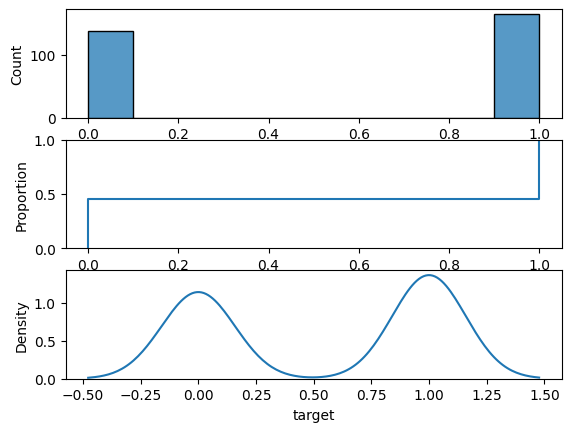

In [ ]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(df.target, ax=axs[0])
sns.ecdfplot(df.target, ax=axs[1])
sns.kdeplot(df.target, ax=axs[2])

### 5. Вычислить матрицу корреляций между признаками. Построить тепловую карту (heatmap).

In [ ]:
df_corr = df.corr()
print(df_corr)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

<Axes: >

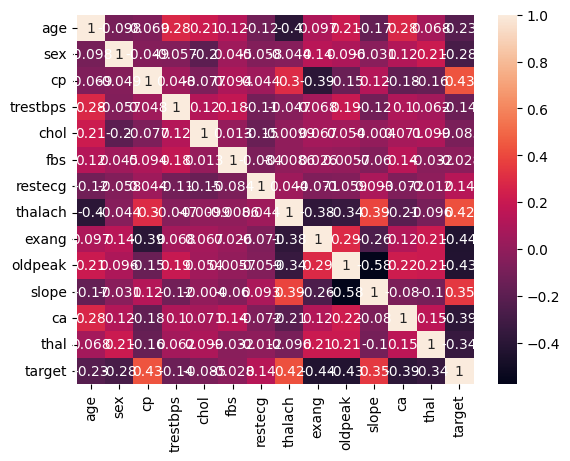

In [ ]:
sns.heatmap(df_corr, annot=True)

### Извлечения новых признаков (feature extraction)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

X = df.drop("age", axis=1)
Y = df["age"]
# Если данные в виде текста
# Y = LabelEncoder().fit_transform(Y)
# X = StandardScaler().fit_transform(X)

Метод главных компонент

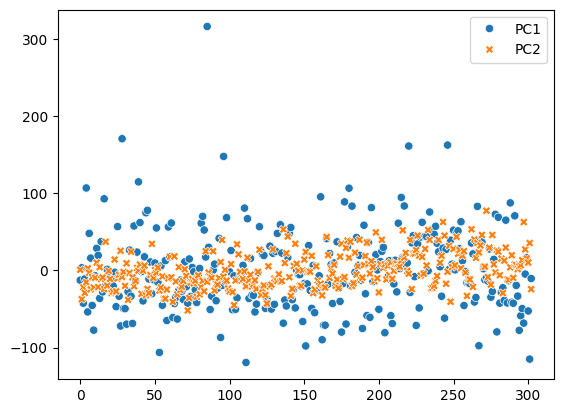

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
sns.scatterplot(PCA_df)
PCA_df = pd.concat([PCA_df, df['age']], axis = 1)
PCA_df['age'] = LabelEncoder().fit_transform(PCA_df['age'])
# PCA_df.head()


Метод независимых компонент

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


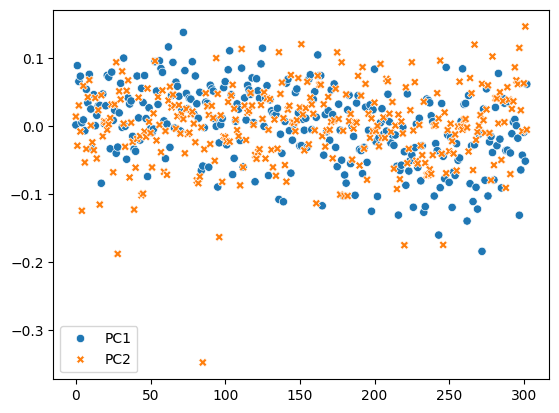

In [ ]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=2)
X_ica = ica.fit_transform(X)
ICA_df = pd.DataFrame(data = X_ica, columns = ['PC1', 'PC2'])
sns.scatterplot(ICA_df)
ICA_df = pd.concat([ICA_df, df['age']], axis = 1)
ICA_df['age'] = LabelEncoder().fit_transform(ICA_df['age'])
# ICA_df.head()

Линейный дискриминантный анализ

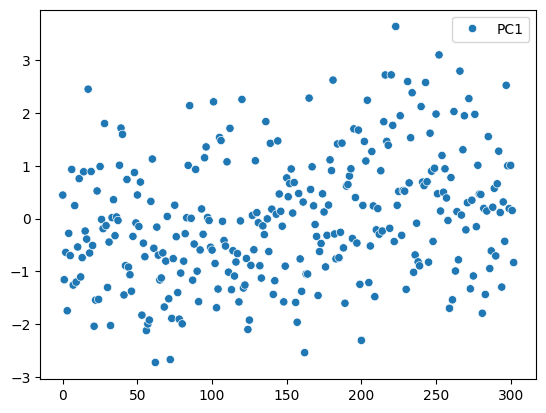

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit(X, LabelEncoder().fit_transform(Y)).transform(X)
LDA_df = pd.DataFrame(data = X_lda, columns = ['PC1'])
sns.scatterplot(LDA_df)
LDA_df = pd.concat([LDA_df, df['age']], axis = 1)
LDA_df['age'] = LabelEncoder().fit_transform(LDA_df['age'])
# LDA_df.head()

### Преобразования признаков (feature transformation). Как минимум z-score scaling.

#### Линейные преобразования

In [ ]:
import warnings
warnings.filterwarnings("ignore")

<Axes: ylabel='Density'>

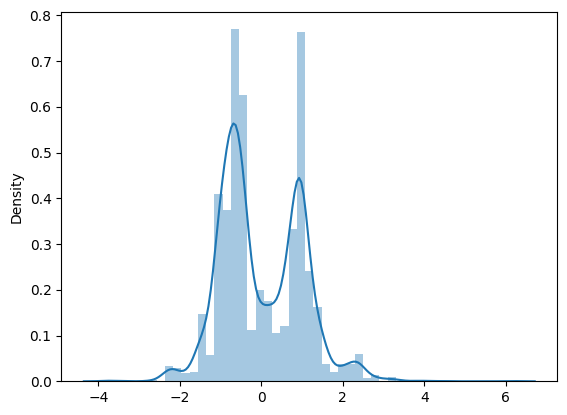

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(data = X_scaled)
# X_scaled_df.head()
sns.distplot(X_scaled_df)

<Axes: ylabel='Density'>

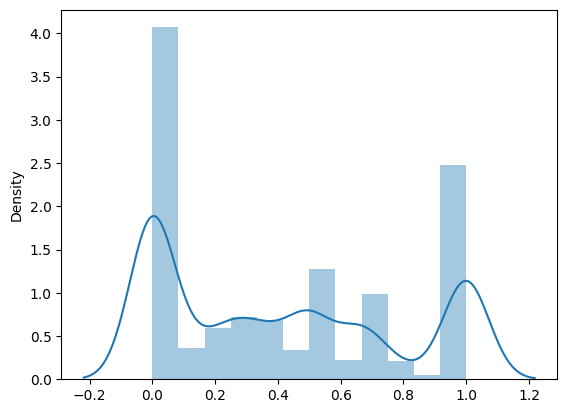

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(data = X_scaled)
# X_scaled_df.head()
sns.distplot(X_scaled_df)

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder()
# print(encoder.fit_transform(df).toarray()[0])

#### Нелинейные преобразования

<Axes: ylabel='Density'>

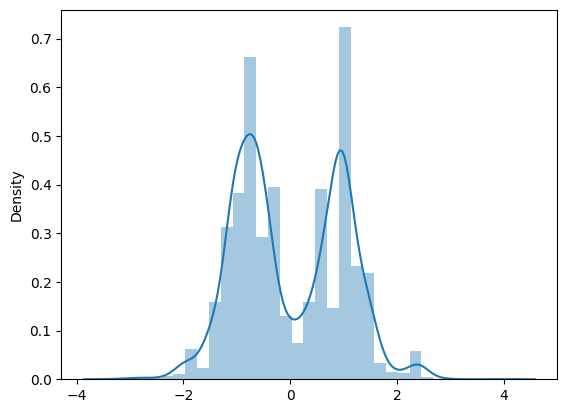

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
X_scaled = pt.fit_transform(X)
X_scaled_df = pd.DataFrame(data = X_scaled)
# X_scaled_df.head()
sns.distplot(X_scaled_df)

### Отбора признаков и объектов (feature selection). Как минимум анализ выбросов, аномалий и сильно коррелирующих признаков.

Эталон

In [ ]:
X_fs = df.drop("age", axis=1)
X_fs.shape

(303, 13)

#### Удаление выбросов

Метод межквартильного диапазона:

In [ ]:
Q1 = X_fs.quantile(q=.25)
Q3 = X_fs.quantile(q=.75)
IQR = X_fs.apply(sp.stats.iqr)
X_fs_iqr_clean = X_fs[~((X_fs < Q1-1.5*IQR ) | (X_fs > Q3+1.5*IQR)).any(axis=1)]
print(X_fs_iqr_clean.shape)
print(X_fs_iqr_clean.head())

(228, 13)
   sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  \
1    1   2       130   250    0        1      187      0      3.5      0   0   
2    0   1       130   204    0        0      172      0      1.4      2   0   
3    1   1       120   236    0        1      178      0      0.8      2   0   
4    0   0       120   354    0        1      163      1      0.6      2   0   
5    1   0       140   192    0        1      148      0      0.4      1   0   

   thal  target  
1     2       1  
2     2       1  
3     2       1  
4     2       1  
5     1       1  


Метод Z-оценки:

In [ ]:
z = sp.stats.zscore(X_fs)
X_fs_zscore_clean = X_fs[(z<3).all(axis=1)]
print(X_fs_zscore_clean.shape)
print(X_fs_zscore_clean.head())

(290, 13)
   sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  \
0    1   3       145   233    1        0      150      0      2.3      0   0   
1    1   2       130   250    0        1      187      0      3.5      0   0   
2    0   1       130   204    0        0      172      0      1.4      2   0   
3    1   1       120   236    0        1      178      0      0.8      2   0   
4    0   0       120   354    0        1      163      1      0.6      2   0   

   thal  target  
0     1       1  
1     2       1  
2     2       1  
3     2       1  
4     2       1  


Сравнение

In [ ]:
pd.concat([X_fs_iqr_clean, X_fs_zscore_clean]).drop_duplicates(keep=False)

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,3,145,233,1,0,150,0,2.3,0,0,1,1
8,1,2,172,199,1,1,162,0,0.5,2,0,3,1
14,0,3,150,283,1,0,162,0,1.0,2,0,2,1
23,1,2,150,243,1,1,137,1,1.0,1,0,2,1
26,1,2,150,212,1,1,157,0,1.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,1,2,126,218,1,1,134,0,2.2,1,1,1,0
291,1,0,114,318,0,2,140,0,4.4,0,3,1,0
292,0,0,170,225,1,0,146,1,2.8,1,2,1,0
297,1,0,164,176,1,0,90,0,1.0,1,2,1,0


#### Удаление аномалий

Пустые значения

In [ ]:
X_fs_na_clean = X_fs.dropna()
X_fs_na_clean.shape

(303, 13)

Отрицательные затраты

In [ ]:
#X_fs_neg_clean = X_fs.drop(X_fs[X_fs.age<0].index)
X_fs_neg_clean = X_fs.drop(X_fs[X_fs.sex<0].index)
X_fs_neg_clean = X_fs.drop(X_fs[X_fs.cp<0].index)
X_fs_neg_clean = X_fs.drop(X_fs[X_fs.trestbps<0].index)
X_fs_neg_clean = X_fs.drop(X_fs[X_fs.chol<0].index)
X_fs_neg_clean = X_fs.drop(X_fs[X_fs.fbs<0].index)
X_fs_neg_clean = X_fs.drop(X_fs[X_fs.restecg<0].index)
X_fs_neg_clean = X_fs.drop(X_fs[X_fs.thalach<0].index)
X_fs_neg_clean = X_fs.drop(X_fs[X_fs.exang<0].index)
X_fs_neg_clean = X_fs.drop(X_fs[X_fs.oldpeak<0].index)
X_fs_neg_clean = X_fs.drop(X_fs[X_fs.slope<0].index)
X_fs_neg_clean = X_fs.drop(X_fs[X_fs.ca<0].index)
X_fs_neg_clean = X_fs.drop(X_fs[X_fs.thal<0].index)
X_fs_neg_clean = X_fs.drop(X_fs[X_fs.target<0].index)
X_fs_neg_clean.shape

(303, 13)

#### Удаление сильно коррелирующих признаков

In [ ]:
corr_matrix = X_fs_zscore_clean.corr()
# Выберем верхний треугольник матрицы
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Найдем признаки с корреляцией больше 0.3
to_drop = [column for column in upper.columns if any(upper[column] > 0.3)]
X_fs_no_high_corr = X_fs.drop(to_drop, axis=1)
print(X_fs_no_high_corr.shape)
print(X_fs_no_high_corr.head())

(303, 11)
   sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ca  thal
0    1   3       145   233    1        0      150      0      2.3   0     1
1    1   2       130   250    0        1      187      0      3.5   0     2
2    0   1       130   204    0        0      172      0      1.4   0     2
3    1   1       120   236    0        1      178      0      0.8   0     2
4    0   0       120   354    0        1      163      1      0.6   0     2
